In [1]:
import numpy as np
from skimage import io, data, transform
from scipy import sparse
from scipy import io as spio
import matplotlib.pyplot as plt
from img_utils import cgls, del2_matrix, split_bregman
plt.gray()
%matplotlib inline
%load_ext autoreload
%autoreload 2

### TV regularization
TV regularization is a problem that is very similar in form to Tikhonov regularization, but instead of putting a Gaussian prior on the derivative, we put a zero-centered Laplace prior on the derivative. This makes our prior become 
$$\Pr(x) \propto \exp\left(-\frac{1}{\sigma_l}\left\lVert L_x x \right\rVert_1\right)\exp\left(-\frac{1}{\sigma_l}\left\lVert L_y x \right\rVert_1\right)=\exp\left(-\frac{1}{\sigma_l}\left(\left\lVert L_x x \right\rVert_1+\left\lVert L_y x \right\rVert_1\right)\right)$$
where $\sigma_l$ is the scale parameter of the Laplace distribution. 
This changes our negative log likelihood to be of the form
$$
    -\log L(x) \propto \frac{1}{2\sigma_x^2}\lVert Ax - b \rVert + \frac{1}{\sigma_l}\left(\lVert L_x x \rVert_1 + \lVert L_y x \rVert_1\right)
$$

Although we can try to optimize this with a method like gradient descent, it is much more efficient to use an algorithm like Split Bregman, which creates auxillary variables $z_1 = L_x x$, $z_2 = L_y x$, and then solves the system using the Lagrangian, with the substitutions of $z_1$ and $z_2$ in the likelihood, and the equality constraints.

In [3]:
im = transform.resize(data.camera(), (256, 256))

/usr/local/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


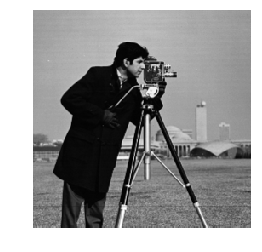

In [4]:
plt.imshow(im)
plt.axis('off')

In [5]:
n = np.prod(im.shape)

In [44]:
sigma = 0.05
np.random.seed(1234)
indices = np.random.choice(
    np.prod(im.shape), size=(int(0.1 * np.prod(im.shape))), replace=False)
a = A = sparse.eye(np.prod(im.shape))
a = A = spio.loadmat('./convmat.mat')['A']
a = A = A.tocsr()[indices, :]
np.random.seed(4514142)
b = A @ im.reshape(-1) + np.random.randn(A.shape[0]) * sigma
m, n = A.shape

In [55]:
t = split_bregman(A, b, 0.5, 0.5, 50)

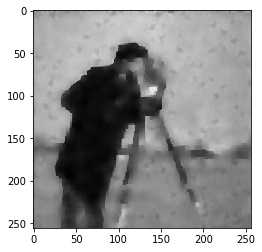

In [56]:
plt.imshow(t.reshape(*im.shape))